In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Analisis de datos laboratorio uno energia solar
En este documento se encuentra el procesamiento de datos y las visualizaciones usadas en el desarrollo de la primera practica de laboratorio del curso de energia solar FV

In [2]:
v_mid_sun = np.arange(0, 6.7, 0.1)
V_mid_sun = np.array(v_mid_sun)
a = 147.9
b = 0.002603
c= 1.656 
I_mid_sun = a - b*(np.exp(c*V_mid_sun)-1)
data = pd.ExcelFile("D:\Descargas\ESFV5.xlsx")
data_mid_sun = pd.read_excel(data, 'mid_sun')
voltaje = np.array(data_mid_sun)[2:,2]

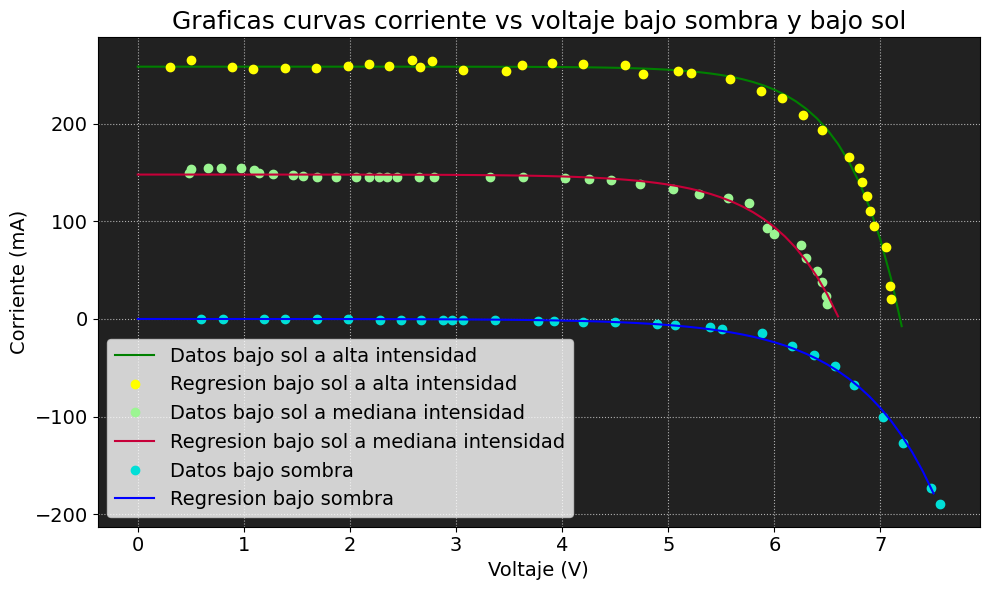

In [3]:
corriente = np.array(data_mid_sun)[2:,3]
V_in_shadow = np.array(pd.read_excel(data, 'Hoja1'))[2:,2]
I_in_shadow = np.array(pd.read_excel(data, 'Hoja1'))[2:,4]
d = -0.007544
e = 1.343
v_shadow = np.arange(0, 7.6, 0.1)
I_eq_shadow = d*(np.exp(e*v_shadow))
v_eq_full_sun = np.array(np.arange(0, 7.3, 0.1))
f = 258.4
g = 0.0001292
h = 2.019
I_eq_full_sun = f - g*(np.exp(h*v_eq_full_sun)-1)
v_datos_full_sun = np.array(pd.read_excel(data, 'Hoja2'))[2:,2]
I_datos_full_sun = np.array(pd.read_excel(data, 'Hoja2'))[2:,3]
power_mid = I_mid_sun * V_mid_sun
power_full_sun = v_eq_full_sun * I_eq_full_sun
xmax1 = v_eq_full_sun[np.argmax(power_full_sun)]
ymax2 = I_eq_full_sun[np.argmax(power_full_sun)]
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams["font.family"] = 'sans-serif'
#PLOT CURRENT IN FULL SUN
ax.plot(v_eq_full_sun,I_eq_full_sun, color='green', label='Datos bajo sol a alta intensidad')
ax.plot(v_datos_full_sun,I_datos_full_sun, 'o', color='#FFFF00', label='Regresion bajo sol a alta intensidad')
#plot current a mediana intensidad
ax.plot(voltaje,corriente, 'o', color='#9BF592', label='Datos bajo sol a mediana intensidad')
ax.plot(V_mid_sun,I_mid_sun, color='#C70039', label='Regresion bajo sol a mediana intensidad')
#PLOT IN SHADOW
ax.plot(V_in_shadow,I_in_shadow, 'o', color='#01DFD7', label='Datos bajo sombra')
ax.plot(v_shadow,I_eq_shadow, color='blue', label='Regresion bajo sombra')
ax.set_xlabel('Voltaje (V)', fontsize=14)
ax.set_ylabel('Corriente (mA)', fontsize=14)
ax.set_title('Graficas curvas corriente vs voltaje bajo sombra y bajo sol', fontsize=18)
ax.legend(loc='lower left', fontsize=14)
ax.tick_params(labelsize=14)
ax.grid(ls=':')
ax.set_facecolor('#212121')
fig.tight_layout()
fig.savefig('graph.pdf')

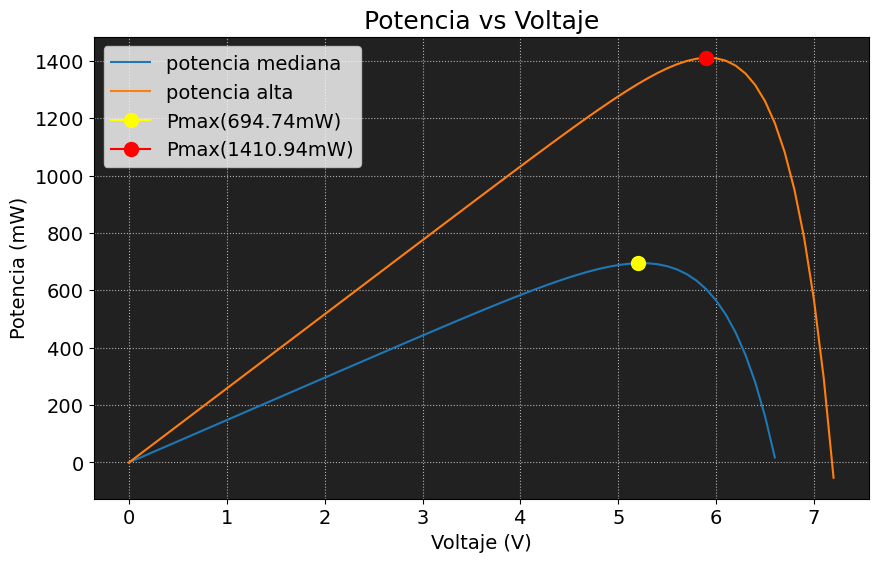

In [4]:

fig1,bx= plt.subplots(figsize=(10,6))
bx.plot(V_mid_sun, power_mid, label='potencia mediana')
bx.plot(v_eq_full_sun, power_full_sun, label='potencia alta')
xmax = V_mid_sun[np.argmax(power_mid)]
ymax = power_mid.max()
Xhighmax = v_eq_full_sun[np.argmax(power_full_sun)]
Yhighmax = power_full_sun.max()
bx.plot(xmax, ymax, marker='o', color='yellow', label=f'Pmax({ymax:.2f}mW)', markersize=10)
bx.plot(Xhighmax, Yhighmax, marker='o', color='red', label=f'Pmax({Yhighmax:.2f}mW)', markersize=10)
bx.set_xlabel('Voltaje (V)', fontsize=14)
bx.set_ylabel('Potencia (mW)', fontsize=14)
bx.set_title('Potencia vs Voltaje', fontsize=18)
bx.legend(loc='upper left', fontsize=14)
bx.tick_params(labelsize=14)
bx.grid(ls=':')
bx.set_facecolor('#212121')
fig.tight_layout()
fig1.savefig('graphpower.pdf')

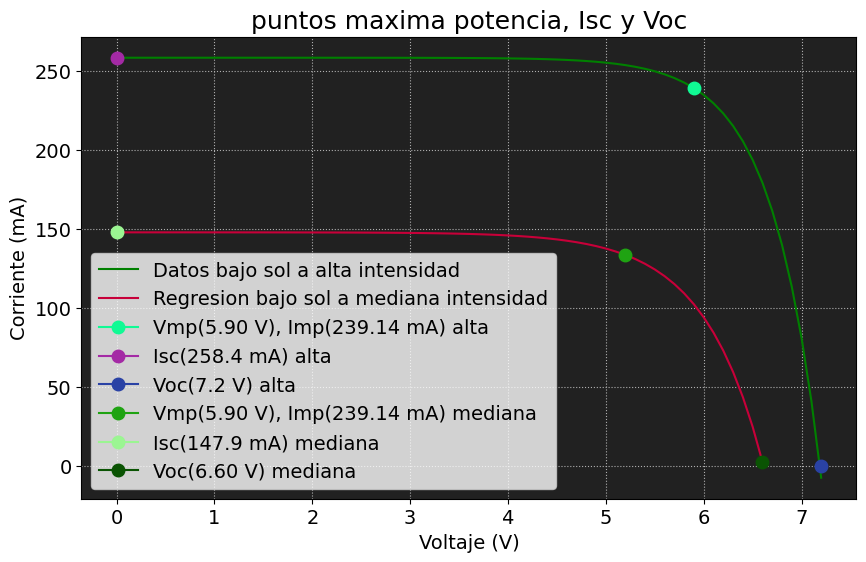

In [5]:
fig2, cx = plt.subplots(figsize=(10,6))
xmaxmid = v_mid_sun[np.argmax(power_mid)]
ymaxmid = I_mid_sun[np.argmax(power_mid)]
plt.rcParams["font.family"] = 'sans-serif'
#PLOT CURRENT IN FULL SUN
cx.plot(v_eq_full_sun,I_eq_full_sun, color='green', label='Datos bajo sol a alta intensidad')
cx.plot(V_mid_sun,I_mid_sun, color='#C70039', label='Regresion bajo sol a mediana intensidad')
cx.set_xlabel('Voltaje (V)', fontsize=14)
cx.set_ylabel('Corriente (mA)', fontsize=14)
cx.set_title('puntos maxima potencia, Isc y Voc', fontsize=18)
cx.plot(xmax1, ymax2, marker='o', color='#10FA94', label=f'Vmp({xmax1:.2f} V), Imp({ymax2:.2f} mA) alta ', markersize=9)
cx.plot(v_eq_full_sun.min(), I_eq_full_sun.max(), marker='o', color='#A42AA5', label=f'Isc({I_eq_full_sun.max()} mA) alta', markersize=9)
cx.plot(v_eq_full_sun.max(), 0, marker='o', color='#2A42A5', label=f'Voc({v_eq_full_sun.max()} V) alta', markersize=9)
cx.plot(xmaxmid, ymaxmid, marker='o', color='#1FA312', label=f'Vmp({xmax1:.2f} V), Imp({ymax2:.2f} mA) mediana', markersize=9)
cx.plot(v_mid_sun.min(), I_mid_sun.max(), marker='o', color='#9BF592', label=f'Isc({I_mid_sun.max()} mA) mediana', markersize=9)
cx.plot(v_mid_sun.max(), I_mid_sun.min(), marker='o', color='#0A5403', label=f'Voc({v_mid_sun.max():.2f} V) mediana', markersize=9)
cx.legend(loc='lower left', fontsize=14)
cx.tick_params(labelsize=14)
cx.grid(ls=':')
cx.set_facecolor('#212121')
fig.tight_layout()
fig2.savefig('graphmarkers.pdf')
